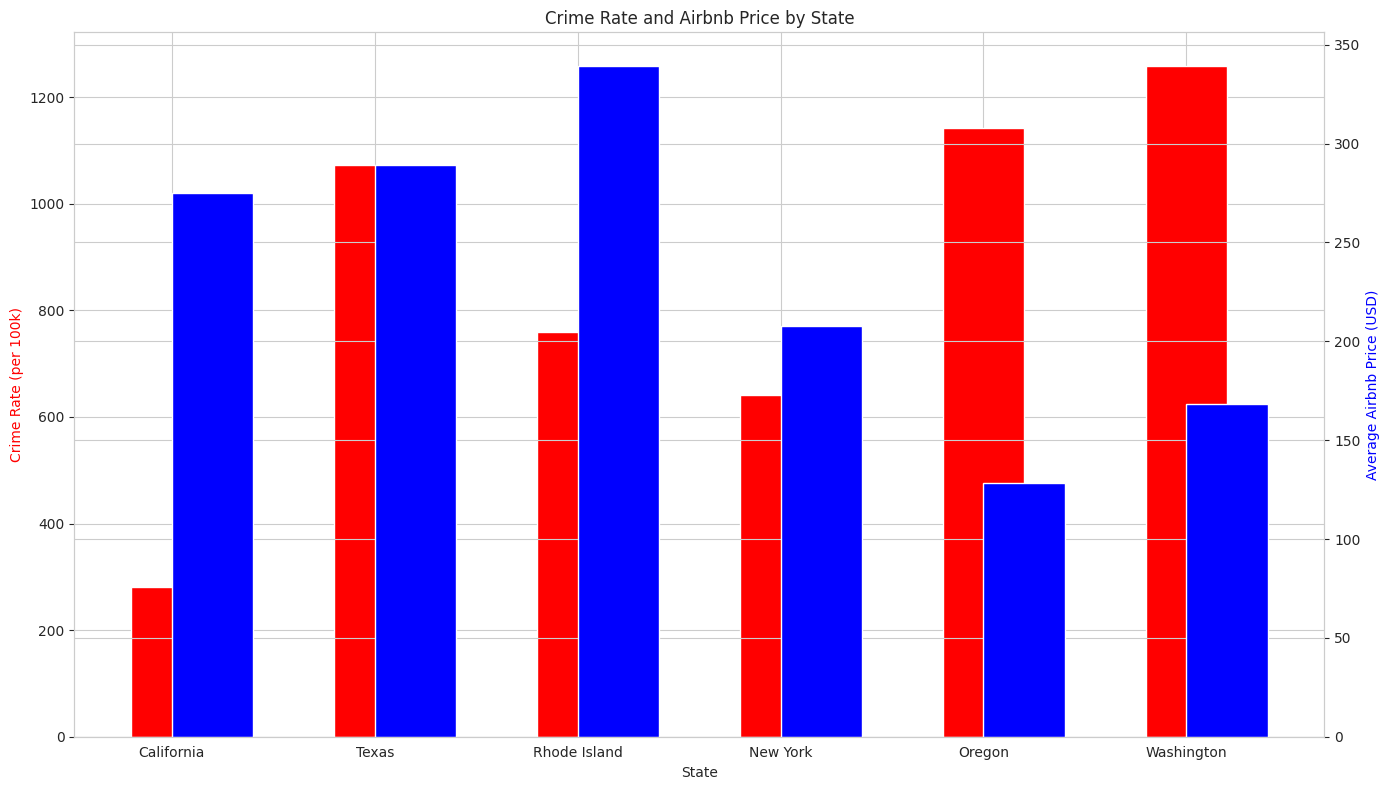

--- Pearson Correlations ---
Robbery vs Airbnb Price: r = -0.515, p-value = 0.2954
Assault vs Airbnb Price: r = -0.467, p-value = 0.3501

--- Spearman Correlations ---
Robbery vs Airbnb Price: rho = -0.429, p-value = 0.3965
Assault vs Airbnb Price: rho = -0.543, p-value = 0.2657


<ipython-input-7-c6d824ab2a10>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_results, x='Metric', y='Correlation', palette='coolwarm')


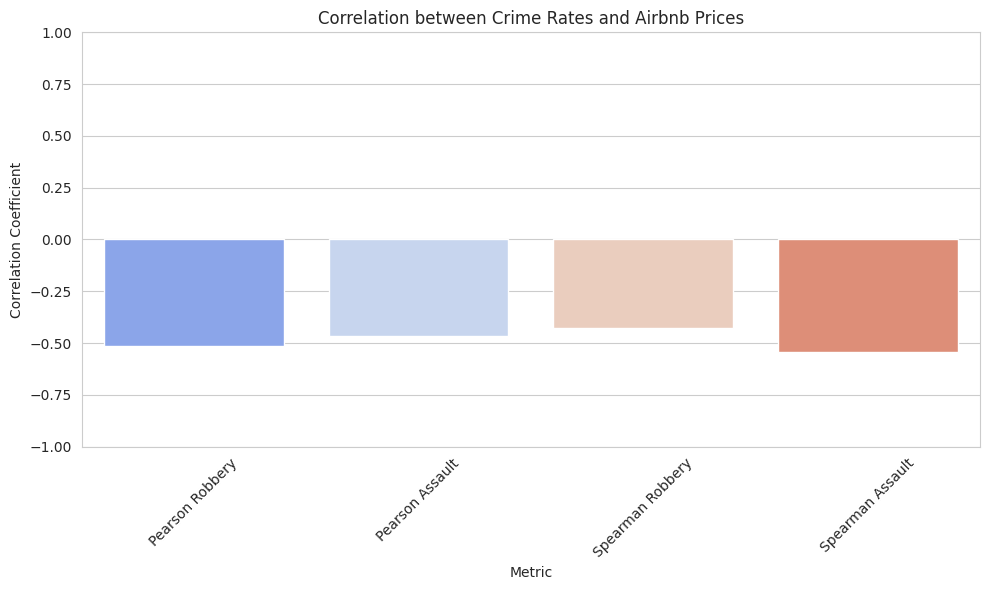

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

merged_data = pd.read_csv("merged_crime_airbnb_data.csv")

sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14,8))

crime_scores = (merged_data['Robbery_per_100k'] + merged_data['Assault_per_100k']) / 2
ax1.bar(merged_data['State'], crime_scores, color='red', width=0.4, label='Average Crime Rate', align='center')

ax2 = ax1.twinx()
ax2.bar(merged_data['State'], merged_data['Average_Price'], color='blue', width=0.4, label='Average Airbnb Price', align='edge')

ax1.set_xlabel('State')
ax1.set_ylabel('Crime Rate (per 100k)', color='red')
ax2.set_ylabel('Average Airbnb Price (USD)', color='blue')

plt.title('Crime Rate and Airbnb Price by State')
fig.tight_layout()
plt.show()

pearson_robbery = pearsonr(merged_data['Robbery_per_100k'], merged_data['Average_Price'])
pearson_assault = pearsonr(merged_data['Assault_per_100k'], merged_data['Average_Price'])

spearman_robbery = spearmanr(merged_data['Robbery_per_100k'], merged_data['Average_Price'])
spearman_assault = spearmanr(merged_data['Assault_per_100k'], merged_data['Average_Price'])

print("--- Pearson Correlations ---")
print(f"Robbery vs Airbnb Price: r = {pearson_robbery[0]:.3f}, p-value = {pearson_robbery[1]:.4f}")
print(f"Assault vs Airbnb Price: r = {pearson_assault[0]:.3f}, p-value = {pearson_assault[1]:.4f}\n")

print("--- Spearman Correlations ---")
print(f"Robbery vs Airbnb Price: rho = {spearman_robbery.correlation:.3f}, p-value = {spearman_robbery.pvalue:.4f}")
print(f"Assault vs Airbnb Price: rho = {spearman_assault.correlation:.3f}, p-value = {spearman_assault.pvalue:.4f}")

correlation_results = pd.DataFrame({
    'Metric': ['Pearson Robbery', 'Pearson Assault', 'Spearman Robbery', 'Spearman Assault'],
    'Correlation': [
        pearson_robbery[0],
        pearson_assault[0],
        spearman_robbery.correlation,
        spearman_assault.correlation
    ]
})

plt.figure(figsize=(10,6))
sns.barplot(data=correlation_results, x='Metric', y='Correlation', palette='coolwarm')
plt.title('Correlation between Crime Rates and Airbnb Prices')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

